In [1]:
import os
import yaml
import shutil
import torch
from torch import nn
import torchvision
from tqdm import tqdm
import matplotlib.pyplot as plt 
from model.pconv import PartialConv2d
from model.layers import PConvBlock, Stack, FRRB
from model.net import InpaintingGenerator
from data.dataset import Dataset
from utils.model import pad_image

In [2]:
code_path = './'
with open(os.path.join(code_path, 'experiments/config.yml'), 'r') as f:
    config = yaml.load(f)

/Users/anatolijpotapov/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
dataset = Dataset(config['dataset'], config['path']['train'])
iterator = dataset.create_iterator(config['training']['batch_size'])
batch = iterator.__next__()

In [4]:
image, mask, pad_mask = pad_image(batch['image'], batch['mask'])

In [5]:
ig = InpaintingGenerator(config['architecture']['num_blocks'])

In [7]:
image, mask = ig.forward(image[:1], mask[:1], pad_mask[:1])

/Users/anatolijpotapov/.CMVolumes/Анатолий Потапов/inpainting_FRRN/model/net.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  initial_mask = torch.tensor(mask)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


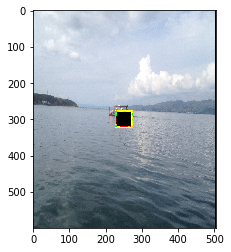

In [8]:
plt.imshow(image[0].permute(1,2,0).detach().numpy())